In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=4
paper='2008.08998'

# Code-generation prompts

In [4]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [5]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [6]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

Alright, I'm given a Hamiltonian equation for a system on a triangular lattice. Let me analyze it step by step.

First, I'll identify the dimension and basis order for this Hamiltonian:

The operators in the Hamiltonian are of the form `c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha)` where:
- `\bm{q}` are reciprocal lattice vectors of the "folded Brillouin zone" and should be taken as the three high-symmetry points: Γ, K, and K' (where K' = -K) in the original Brillouin zone.
- `s` looks like the spin index
- `\bm{p}` is the crystal momentum defined within the folded Brillouin zone (BZ) of the triangular lattice.

So the "flavors" in this system are:
1. Spin (`s`): This likely has 2 values (up and down), though the Hamiltonian doesn't explicitly state it.
2. Reciprocal lattice vector (`\bm{q}`): Given in the problem statement to be Γ, K, and K', so 3 values.

This means the tuple D would be (2, 3) for (|spin|, |reciprocal_lattice_vector|

In [7]:
print(generated_code['thinking'])

Alright, I'm given a Hamiltonian equation for a system on a triangular lattice. Let me analyze it step by step.

First, I'll identify the dimension and basis order for this Hamiltonian:

The operators in the Hamiltonian are of the form `c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha)` where:
- `\bm{q}` are reciprocal lattice vectors of the "folded Brillouin zone" and should be taken as the three high-symmetry points: Γ, K, and K' (where K' = -K) in the original Brillouin zone.
- `s` looks like the spin index
- `\bm{p}` is the crystal momentum defined within the folded Brillouin zone (BZ) of the triangular lattice.

So the "flavors" in this system are:
1. Spin (`s`): This likely has 2 values (up and down), though the Hamiltonian doesn't explicitly state it.
2. Reciprocal lattice vector (`\bm{q}`): Given in the problem statement to be Γ, K, and K', so 3 values.

This means the tuple D would be (2, 3) for (|spin|, |reciprocal_lattice_vector|).

For the basis order:
0: spin. Order: up, down.
1:

In [8]:
print(generated_code['text'])

# Analysis of Hamiltonian and Implementation

## 1. Dimension and Basis Order

Examining the Hamiltonian equation, I can identify that the system has two flavors:
- Spin (s): Can take two values (up/down)
- Reciprocal lattice vector (q): Can take three values (Γ, K, K')

Tuple of Flavors (D) = (2, 3)

Basis Order:
0: spin. Order: up (0), down (1)
1: reciprocal_lattice_vector. Order: Γ (0), K (1), K' (2)

## 2. Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS:
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\delta,s}(\bm{p}_\alpha) \rangle`: Expectation value for Hartree term (same spin)
- `\langle c_{\bm{q}_\alpha,s}^\dagger(\bm{p}_\alpha) c_{\bm{q}_\gamma,s'}(\bm{p}_\alpha) \rangle`: Expectation value for Fock term (different spins possible)

TERMS:
- `-\sum_{s}\sum_{\bm{p},\bm{q}}\sum_{R_\bm{n}} t_{s}(\bm{n}) e^{-i (\bm{p}+\bm{q}) \cdot R_\bm{n}} c_{\bm{p}+\bm{q},s}^\dagger c_{\bm{p},s}` -> H[s, q, s, 0, k], NI (kinetic hopping term)
- `\frac{1}{\mathcal{N}}\sum

In [9]:
code = utils_auto.extract_code(generated_code['text'])

In [10]:
print(code)

import numpy as np
from typing import Any, Dict, Tuple
from scipy.spatial.distance import cdist
from HF import *

class HartreeFockHamiltonian:
    """Hartree-Fock Hamiltonian for a system with spin and valley degrees of freedom
    
    Implements the Hamiltonian for a triangular lattice with electron interactions,
    including tight-binding, Hartree, and Fock terms.
    
    Args:
        N_shell (int): Number of shells in k-space.
        parameters (dict): Dictionary containing model parameters.
        filling_factor (float): Filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'
        self.D = (2, 3)  # (spin, q-vector)
        self.basis_order = {
            '0': 'spin',
            '1': 'reciprocal_lattice_vector'
        }
        # Basis order details:
        # spin: 0 = up, 1 = down
        # reciprocal_lattice_vector: 0 = Γ, 1 = K, 2 = K'

        # Occu

In [11]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2008_08998_4.py


# Code evaluation

In [12]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [13]:
import importlib

In [14]:
module = importlib.import_module(code_path)

In [15]:
import HF

## Task 1: Check k-space

In [16]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

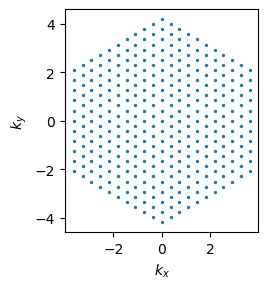

In [17]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

In [19]:
h_nonint = ham.generate_non_interacting()

In [20]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

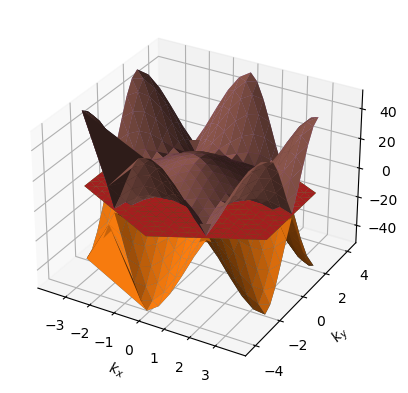

In [21]:
utils_auto.plot_2d_bandstructure(ham,en)

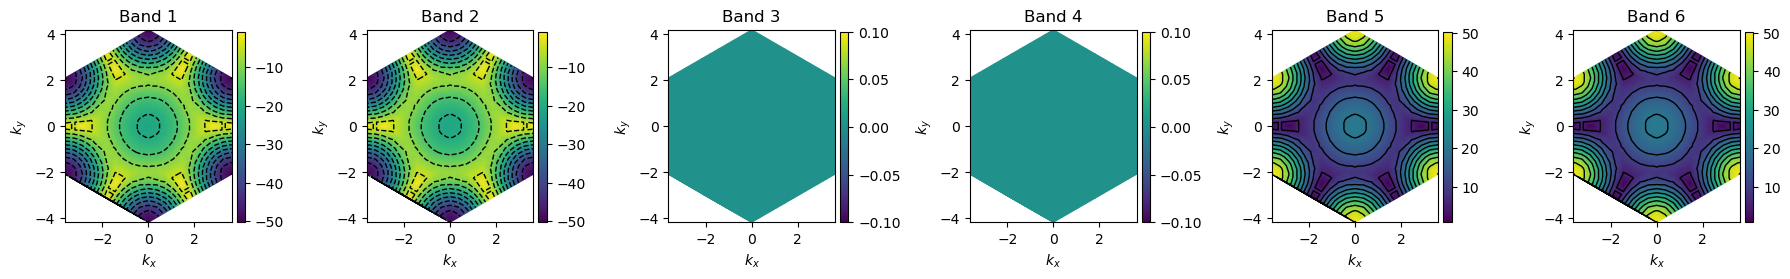

In [22]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [23]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e5},filling_factor=1/2)

In [24]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [25]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

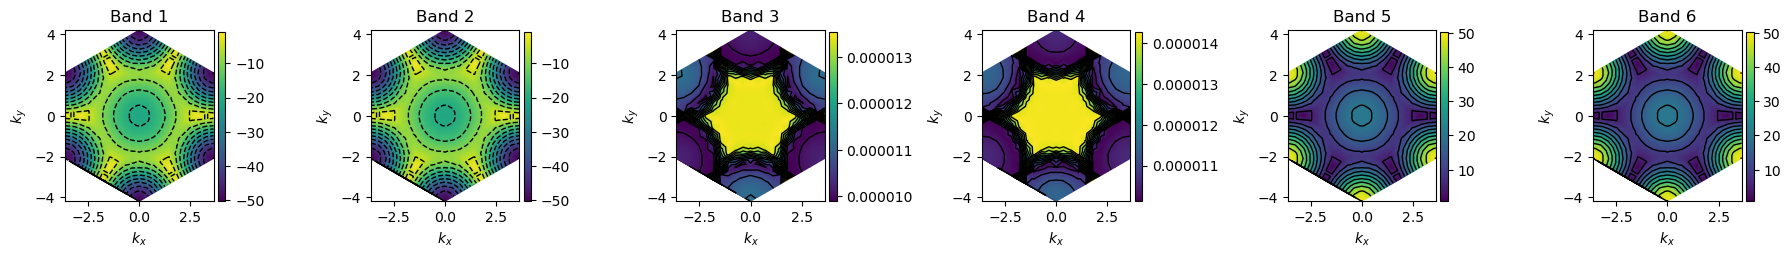

In [26]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit

In [27]:
ham_int= module.HartreeFockHamiltonian(N_shell=10,  parameters={'epsilon_r':1e-2},filling_factor=1/2)


In [28]:
h_nonint=ham_int.generate_non_interacting()
for q in range(3):
    h_nonint[0,q,0,q,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [29]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,99)

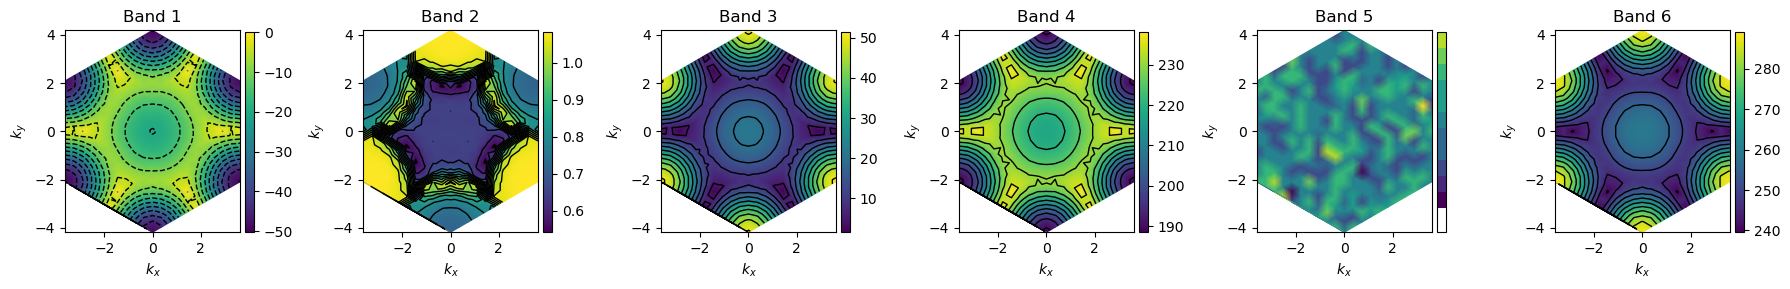

In [30]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [31]:
utils_auto.print_gap(ham_int,exp_val,en_int,2)

Gap is 0.46
U/T is 7.22
mean_U is 20.06


# Auto eval

## Task 1

In [32]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze the image in the context of the problem and rubric.

The image shows a 2D hexagonal mesh of points in momentum space (k-space), where the axes are labeled as k_x and k_y. The points are arranged in a hexagonal pattern, which is consistent with the reciprocal space of a triangular lattice. The triangular lattice in real space would indeed have a hexagonal Brillouin zone in reciprocal space.

The rubric asks me to check:
1. If the image shows a momentum space mesh in the first Brillouin zone
2. The point group symmetry

Let's analyze:

1. Momentum space mesh in first Brillouin zone:
   The image clearly shows a hexagonal arrangement of k-points, which matches the shape of the first Brillouin zone for a triangular lattice. The k-points appear to be distributed uniformly throughout the hexagonal region. The axes range from approximately -4 to 4 in both k_x and k_y directions, which seems reasonable for a normalized represe

In [33]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [34]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

Let me analyze this problem step by step according to the rubric.

The problem shows band structure plots for a triangular lattice system with a Hamiltonian that includes a non-interacting term (H₀) plus Hartree and Fock interaction terms. The image shows 6 bands in the first Brillouin zone.

1. First, identify the shape of the Brillouin zone boundary and confirm it matches what's expected for a triangular lattice.

Looking at the image, I can see that each plot shows a hexagonal Brillouin zone. This is exactly what we expect for a triangular lattice in real space, as the first Brillouin zone of a triangular lattice is a regular hexagon. So this matches the expected geometry.

2. Examine the symmetry of the energy distribution shown by the false color plot:

2.1 Identify the highest energy regions (yellow):
- In Bands 1 and 2: The highest energy regions (yellow) appear at the corners of the hexagon (K and K' points).
- In Bands 3 and

In [35]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [36]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze the image according to the rubric provided. The image shows a series of false color plots for bands 1-6 in the first Brillouin zone after a self-consistent Hartree-Fock calculation with infinitesimal interaction.

1. Brillouin zone shape:
The plots show a hexagonal-shaped Brillouin zone boundary, which is indeed what's expected for a triangular lattice. This matches the expected shape, so this criterion is correct.

2. Symmetry of energy distribution:

2.1 Highest energy regions (yellow):
- In Bands 1-2: The highest energy regions appear at the corners of the hexagon
- In Bands 3-4: The highest energy regions form a star-like pattern in the center
- In Bands 5-6: The highest energy regions form a ring-like pattern around the center

2.2 Pattern of energy variation:
The energy varies radially from the center in most bands, with Band 1-2 showing concentric contours from the center outward. Bands 3-4 show a more complex s

In [37]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [38]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,U_int='U/epsilon_r=1000/1e-2=100000',nu=1/2)
    )


#################### THINKING ####################

Let me analyze this problem step by step according to the rubric.

First, let's look at the image provided:
- There are 6 panels labeled "Band 1" through "Band 6"
- Each panel shows a false color plot of energy across the Brillouin zone
- The x and y axes are labeled kx and ky, representing momentum space coordinates
- The color scales vary for each band, showing different energy ranges

Now let's go through the rubric points:

1. Identify the shape of the Brillouin zone boundary:
The plots clearly show a hexagonal boundary, which is indeed the expected shape for a Brillouin zone of a triangular lattice. This matches what we would expect.

2. Examine the symmetry of the energy distribution:

2.1 Identify highest energy regions (yellow):
- Band 1: Highest energies are at the corners of the hexagon
- Band 2: Highest energies are in the corners of the hexagon
- Band 3: Highest energies are at the corners of the hexagon
- Band 4: Highest

In [39]:
answer4=utils_auto.extract_result_content(result4['text'])

In [40]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '4' saved to final_answer.yaml
